In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [16]:
# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\HARITHA
[nltk_data]     BHOOPATHI\AppData\Roaming\nltk_data...


True

In [17]:
# Sample dataset
data = {
    'Post': [
        'I love this product, it works great!', 
        'Terrible service, never buying again.', 
        'Meh, it’s okay but nothing special.', 
        'Absolutely fantastic, highly recommend!', 
        'Worst experience ever, so disappointed.'
    ],
    'Date': ['2024-08-01', '2024-08-02', '2024-08-03', '2024-08-03', '2024-08-04'],
    'Likes': [12, 5, 3, 20, 1],
    'Retweets': [1, 2, 0, 3, 1]
}

In [18]:
# Convert to DataFrame
df = pd.DataFrame(data)


In [19]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [21]:
# Function to apply sentiment analysis
def get_sentiment(text):
    sentiment_score = sid.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [22]:
# Apply sentiment analysis to each post
df['Sentiment'] = df['Post'].apply(get_sentiment)
print(df)

                                      Post       Date  Likes  Retweets  \
0     I love this product, it works great! 2024-08-01     12         1   
1    Terrible service, never buying again. 2024-08-02      5         2   
2      Meh, it’s okay but nothing special. 2024-08-03      3         0   
3  Absolutely fantastic, highly recommend! 2024-08-03     20         3   
4  Worst experience ever, so disappointed. 2024-08-04      1         1   

  Sentiment  
0  Positive  
1  Negative  
2  Negative  
3  Positive  
4  Negative  


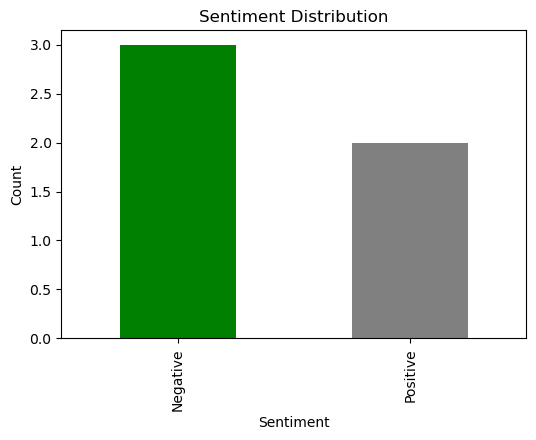

In [23]:
# Plot sentiment distribution
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 800x500 with 0 Axes>

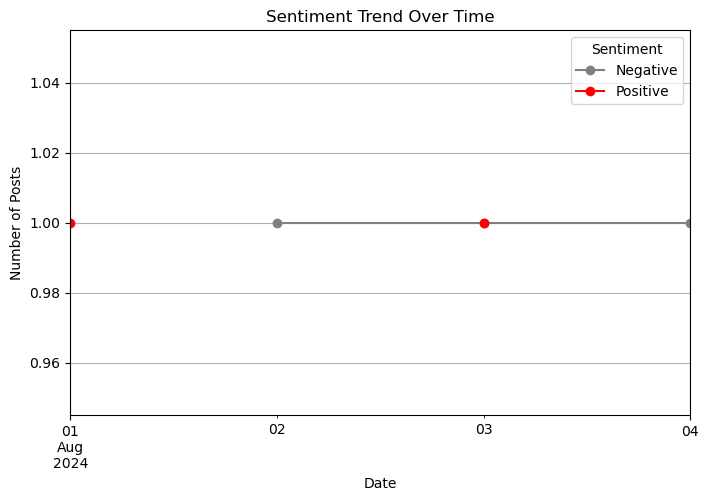

In [24]:
# Count sentiment over time
sentiment_over_time = df.groupby(['Date', 'Sentiment']).size().unstack()

# Plot sentiment trends over time
plt.figure(figsize=(8, 5))
sentiment_over_time.plot(kind='line', marker='o', figsize=(8, 5), color=['gray', 'red', 'green'])
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

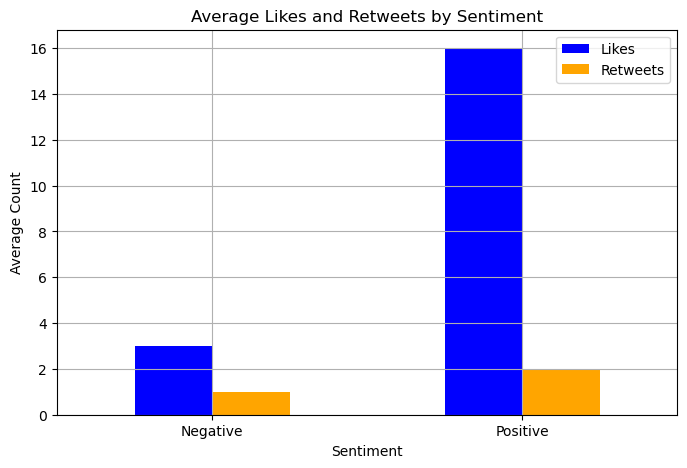

In [25]:
# Group by Sentiment and calculate mean likes and retweets
engagement_by_sentiment = df.groupby('Sentiment')[['Likes', 'Retweets']].mean()

# Plot engagement (Likes and Retweets) by sentiment
engagement_by_sentiment.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))
plt.title('Average Likes and Retweets by Sentiment')
plt.ylabel('Average Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

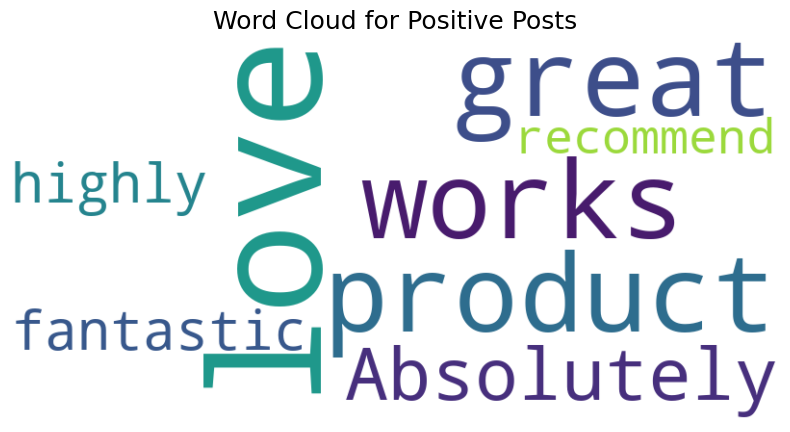

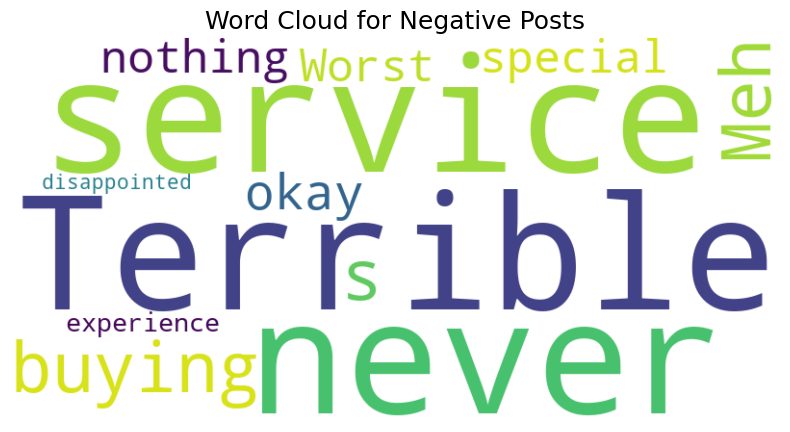

In [28]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

# Separate positive and negative posts
positive_posts = ' '.join(df[df['Sentiment'] == 'Positive']['Post'])
negative_posts = ' '.join(df[df['Sentiment'] == 'Negative']['Post'])

# Generate word clouds
generate_wordcloud(positive_posts, 'Word Cloud for Positive Posts')
generate_wordcloud(negative_posts, 'Word Cloud for Negative Posts')

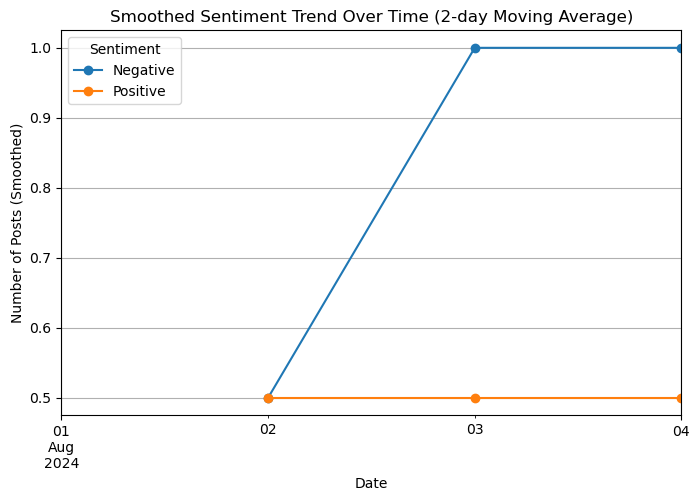

In [29]:
# Count sentiments per day
daily_sentiment_counts = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

# Calculate 2-day moving average for smoothing the trend
daily_sentiment_counts_ma = daily_sentiment_counts.rolling(window=2).mean()

# Plot smoothed sentiment trend over time
daily_sentiment_counts_ma.plot(kind='line', figsize=(8, 5), marker='o')
plt.title('Smoothed Sentiment Trend Over Time (2-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Number of Posts (Smoothed)')
plt.grid(True)
plt.show()

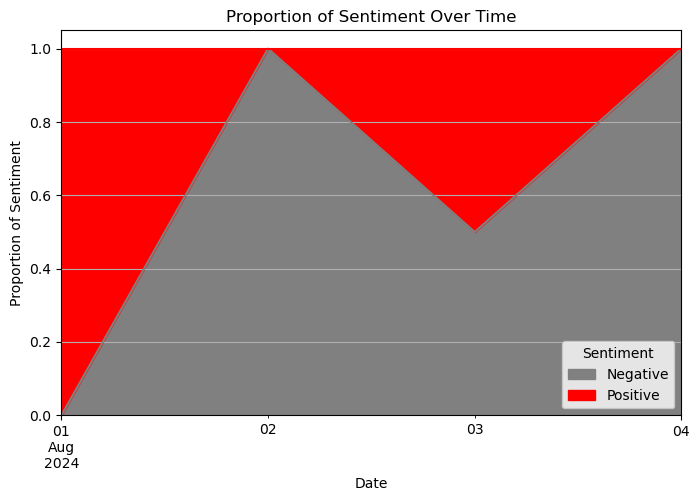

In [30]:
# Calculate daily sentiment proportions
daily_sentiment_proportions = daily_sentiment_counts.div(daily_sentiment_counts.sum(axis=1), axis=0)

# Plot sentiment proportions over time (stacked area plot)
daily_sentiment_proportions.plot(kind='area', figsize=(8, 5), stacked=True, color=['gray', 'red', 'green'])
plt.title('Proportion of Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Sentiment')
plt.grid(True)
plt.show()

In [31]:
# Create a new column for total engagement (likes + retweets)
df['Total Engagement'] = df['Likes'] + df['Retweets']

# Find the post with the highest engagement for each sentiment
most_engaging_posts = df.loc[df.groupby('Sentiment')['Total Engagement'].idxmax()]

# Display the most engaging posts for each sentiment
print("Most Engaging Post for Each Sentiment:\n")
print(most_engaging_posts[['Post', 'Sentiment', 'Likes', 'Retweets', 'Total Engagement']])

Most Engaging Post for Each Sentiment:

                                      Post Sentiment  Likes  Retweets  \
1    Terrible service, never buying again.  Negative      5         2   
3  Absolutely fantastic, highly recommend!  Positive     20         3   

   Total Engagement  
1                 7  
3                23  
